In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import pickle

from Utils import myUtils as mypy
from Analysis import processQuantStudio as pQS
from Analysis import PYMCutils as pmu

%config InlineBackend.figure_format ='retina'
%config Completer.use_jedi = False

In [2]:
import pymc3 as pm
import arviz as az

In [3]:
code_pth, base_pth, data_pth, rslt_pth, fig_pth = mypy.setupPath()
plt.style.use(str(code_pth / 'Utils' / 'futura_presentation.mplstyle'))

In [4]:
TMCC1_targets = [
    'BP88_GC43_ISO', 'BP88_GC43_WT', 'BP30_GC43', 'BP40_GC43',
    'BP55_GC43', 'BP160_GC43', 'BP200_GC43', 'BP240_GC43', 'BP88_GC15',
    'BP88_GC25', 'BP88_GC35', 'BP88_GC55', 'BP88_GC65', 'BP88_GC75',
    'BP88_GC80', 'BP88_GC85', 'BP160_GC10', 'BP160_GC20', 'BP160_GC60',
    'BP160_GC80', 'BP280_GC70', 'BP280_GC30', 'BP500_GC40',
    'BP50_GC25', 'BP50_GC60', 'BP50_GC75', 'BP500_GC60'
]

ARG1_targets = [
    'BP108_GC48_ISO', 'BP88_GC43', 'BP30_GC43', 'BP108_GC48_WT', 'BP108_GC25'
]

GBP6_targets = [
    'BP74_GC53_WT', 'BP74_GC53_ISO', 'BP88_GC43', 'BP30_GC53'
]

genes = ['TMCC1','GBP6','ARG1']
targets = {'TMCC1':TMCC1_targets,'GBP6':GBP6_targets,'ARG1':ARG1_targets}

WT_BP = {'TMCC1':88,'GBP6':74,'ARG1':108}
WT_GC = {'TMCC1':43,'GBP6':53,'ARG1':48}

In [5]:
TMCC1_corrections = {
    'BP500_GC40' : 'BP500_GC42', 'BP500_GC60' : 'BP500_GC57',
    'BP280_GC30' : 'BP280_GC33', 'BP280_GC70' : 'BP280_GC68', 
    'BP240_GC43' : 'BP240_GC42',
    'BP200_GC43' : 'BP200_GC43',
    'BP160_GC10' : 'BP160_GC13', 'BP160_GC20' : 'BP160_GC22', 'BP160_GC60' : 'BP160_GC59', 'BP160_GC80' : 'BP160_GC78',
    'BP55_GC43' : 'BP55_GC45',
    'BP50_GC25' : 'BP50_GC26', 'BP50_GC60' : 'BP50_GC62', 'BP50_GC75' : 'BP50_GC74',
    'BP40_GC43' : 'BP40_GC45',
    'BP30_GC30' : 'BP30_GC27', 'BP30_GC43' : 'BP30_GC47', 'BP30_GC70' : 'BP30_GC67',
    'BP15_GC43' : 'BP15_GC47',
}

In [5]:
with open(rslt_pth / 'JG047 Standardizers.pkl','rb') as buff:
    stdzr = pickle.load(buff)['stdzr']
    
standardizers = pQS.build_standardizers(stdzr)

stdz, unstdz, pm_stdz, pm_unstdz, get_BP, get_GC = standardizers

In [7]:
summaries = {gene:{tar: pd.read_pickle(rslt_pth / gene / f'{tar}_summary.pkl') for tar in targets[gene]} for gene in genes}

In [20]:
models = {gene: dict() for gene in genes}
for gene in genes:
    for tar in targets[gene]:
        with open(rslt_pth / gene / str(tar+'_model.pkl'),'rb') as buff:
            models[gene][tar] = pickle.load(buff)
            
traces = {gene:{tar: pm.load_trace(rslt_pth / gene / tar, model=models[gene][tar])[-1000:] for tar in targets[gene]} for gene in genes}
idata = {gene:{tar: az.from_pymc3(traces[gene][tar], model=models[gene][tar]) for tar in targets[gene]} for gene in genes}

INFO (theano.gof.compilelock): Waiting for existing lock by process '31404' (I am process '23018')
INFO (theano.gof.compilelock): To manually release the lock, delete /rds/general/user/jgoertz/home/.theano/compiledir_Linux-3.10-el7.x86_64-x86_64-with-glibc2.10-x86_64-3.8.5-64/lock_dir


/rds/general/user/jgoertz/home/.conda/envs/pymc3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


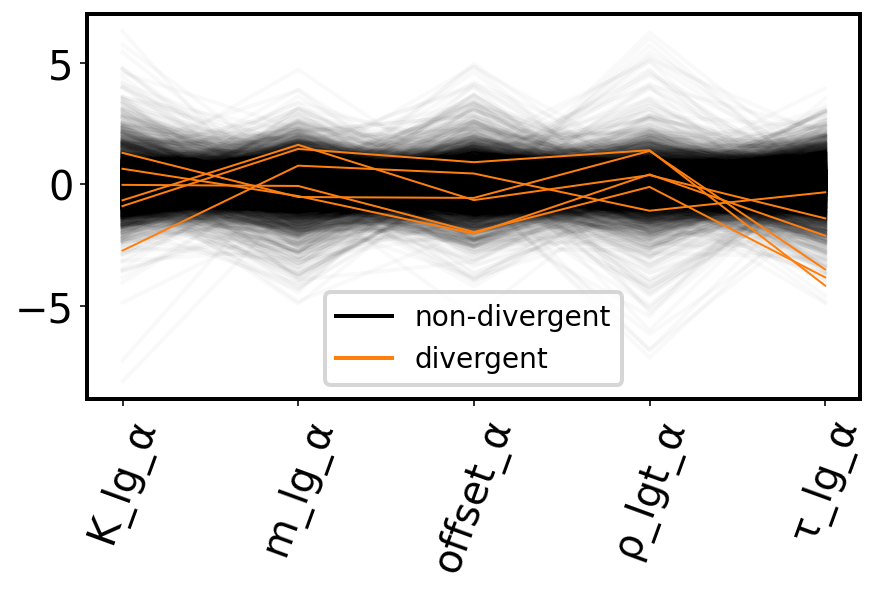

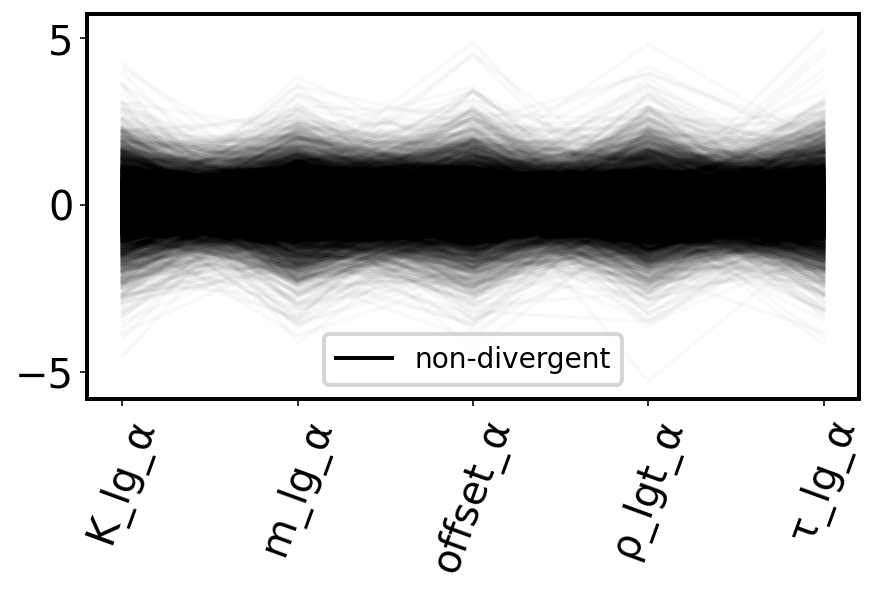

In [21]:
data = idata['TMCC1']['BP500_GC60']
var_names = ['K_lg_α','m_lg_α','offset_α','ρ_lgt_α','τ_lg_α',]
ax = az.plot_parallel(data, var_names=var_names, norm_method='normal')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

data = idata['TMCC1']['BP200_GC43']
var_names = ['K_lg_α','m_lg_α','offset_α','ρ_lgt_α','τ_lg_α',]
ax = az.plot_parallel(data, var_names=var_names, norm_method='normal')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

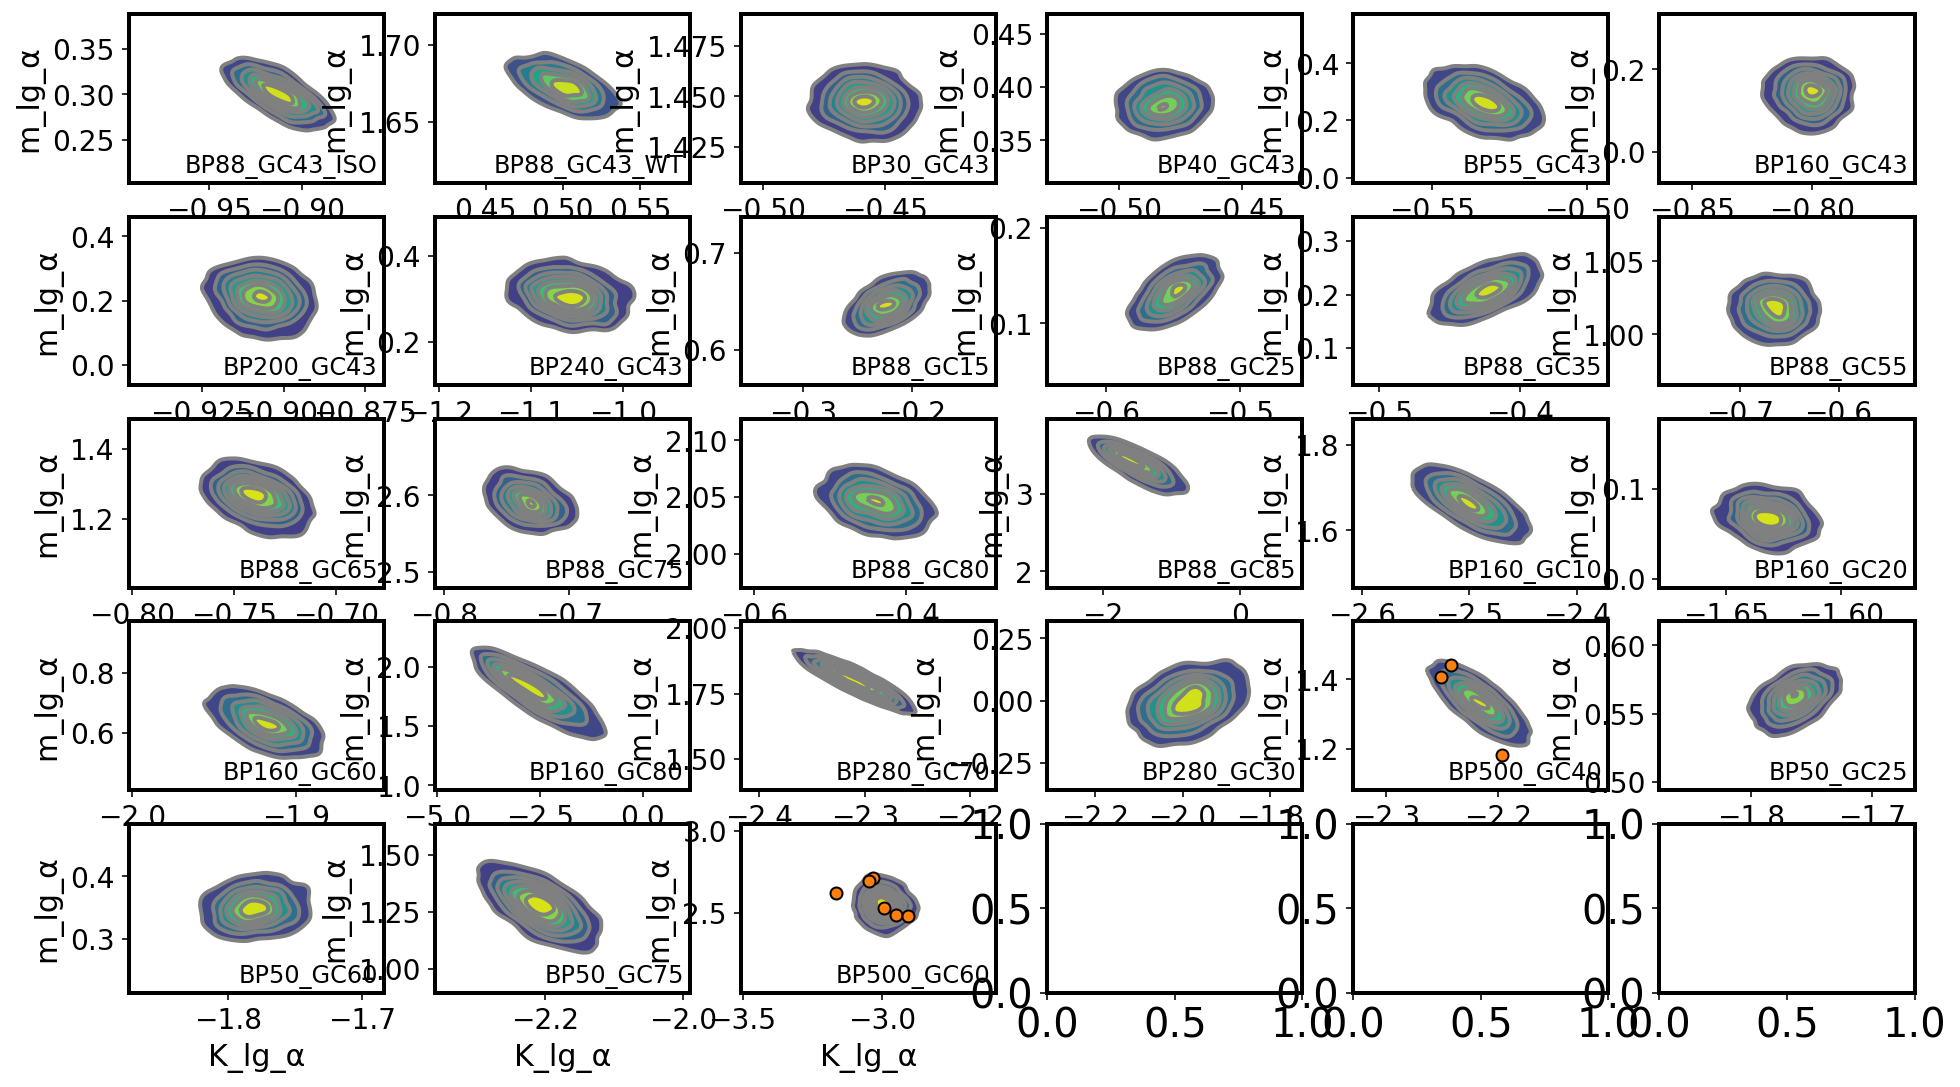

In [22]:
data = idata['TMCC1']['BP500_GC60']
var_names = ['K_lg_α','m_lg_α']

fig,axs = plt.subplots(5,6, figsize=(16,9))

for i,(tar,data) in enumerate(idata['TMCC1'].items()):
    ax = axs.flat[i]
    az.plot_pair(data, var_names=var_names, divergences=True, kind='kde', ax=ax)

    ax.text(.975,.025,tar,
            fontsize=12,
            horizontalalignment='right',
            verticalalignment='bottom',
            transform=ax.transAxes)

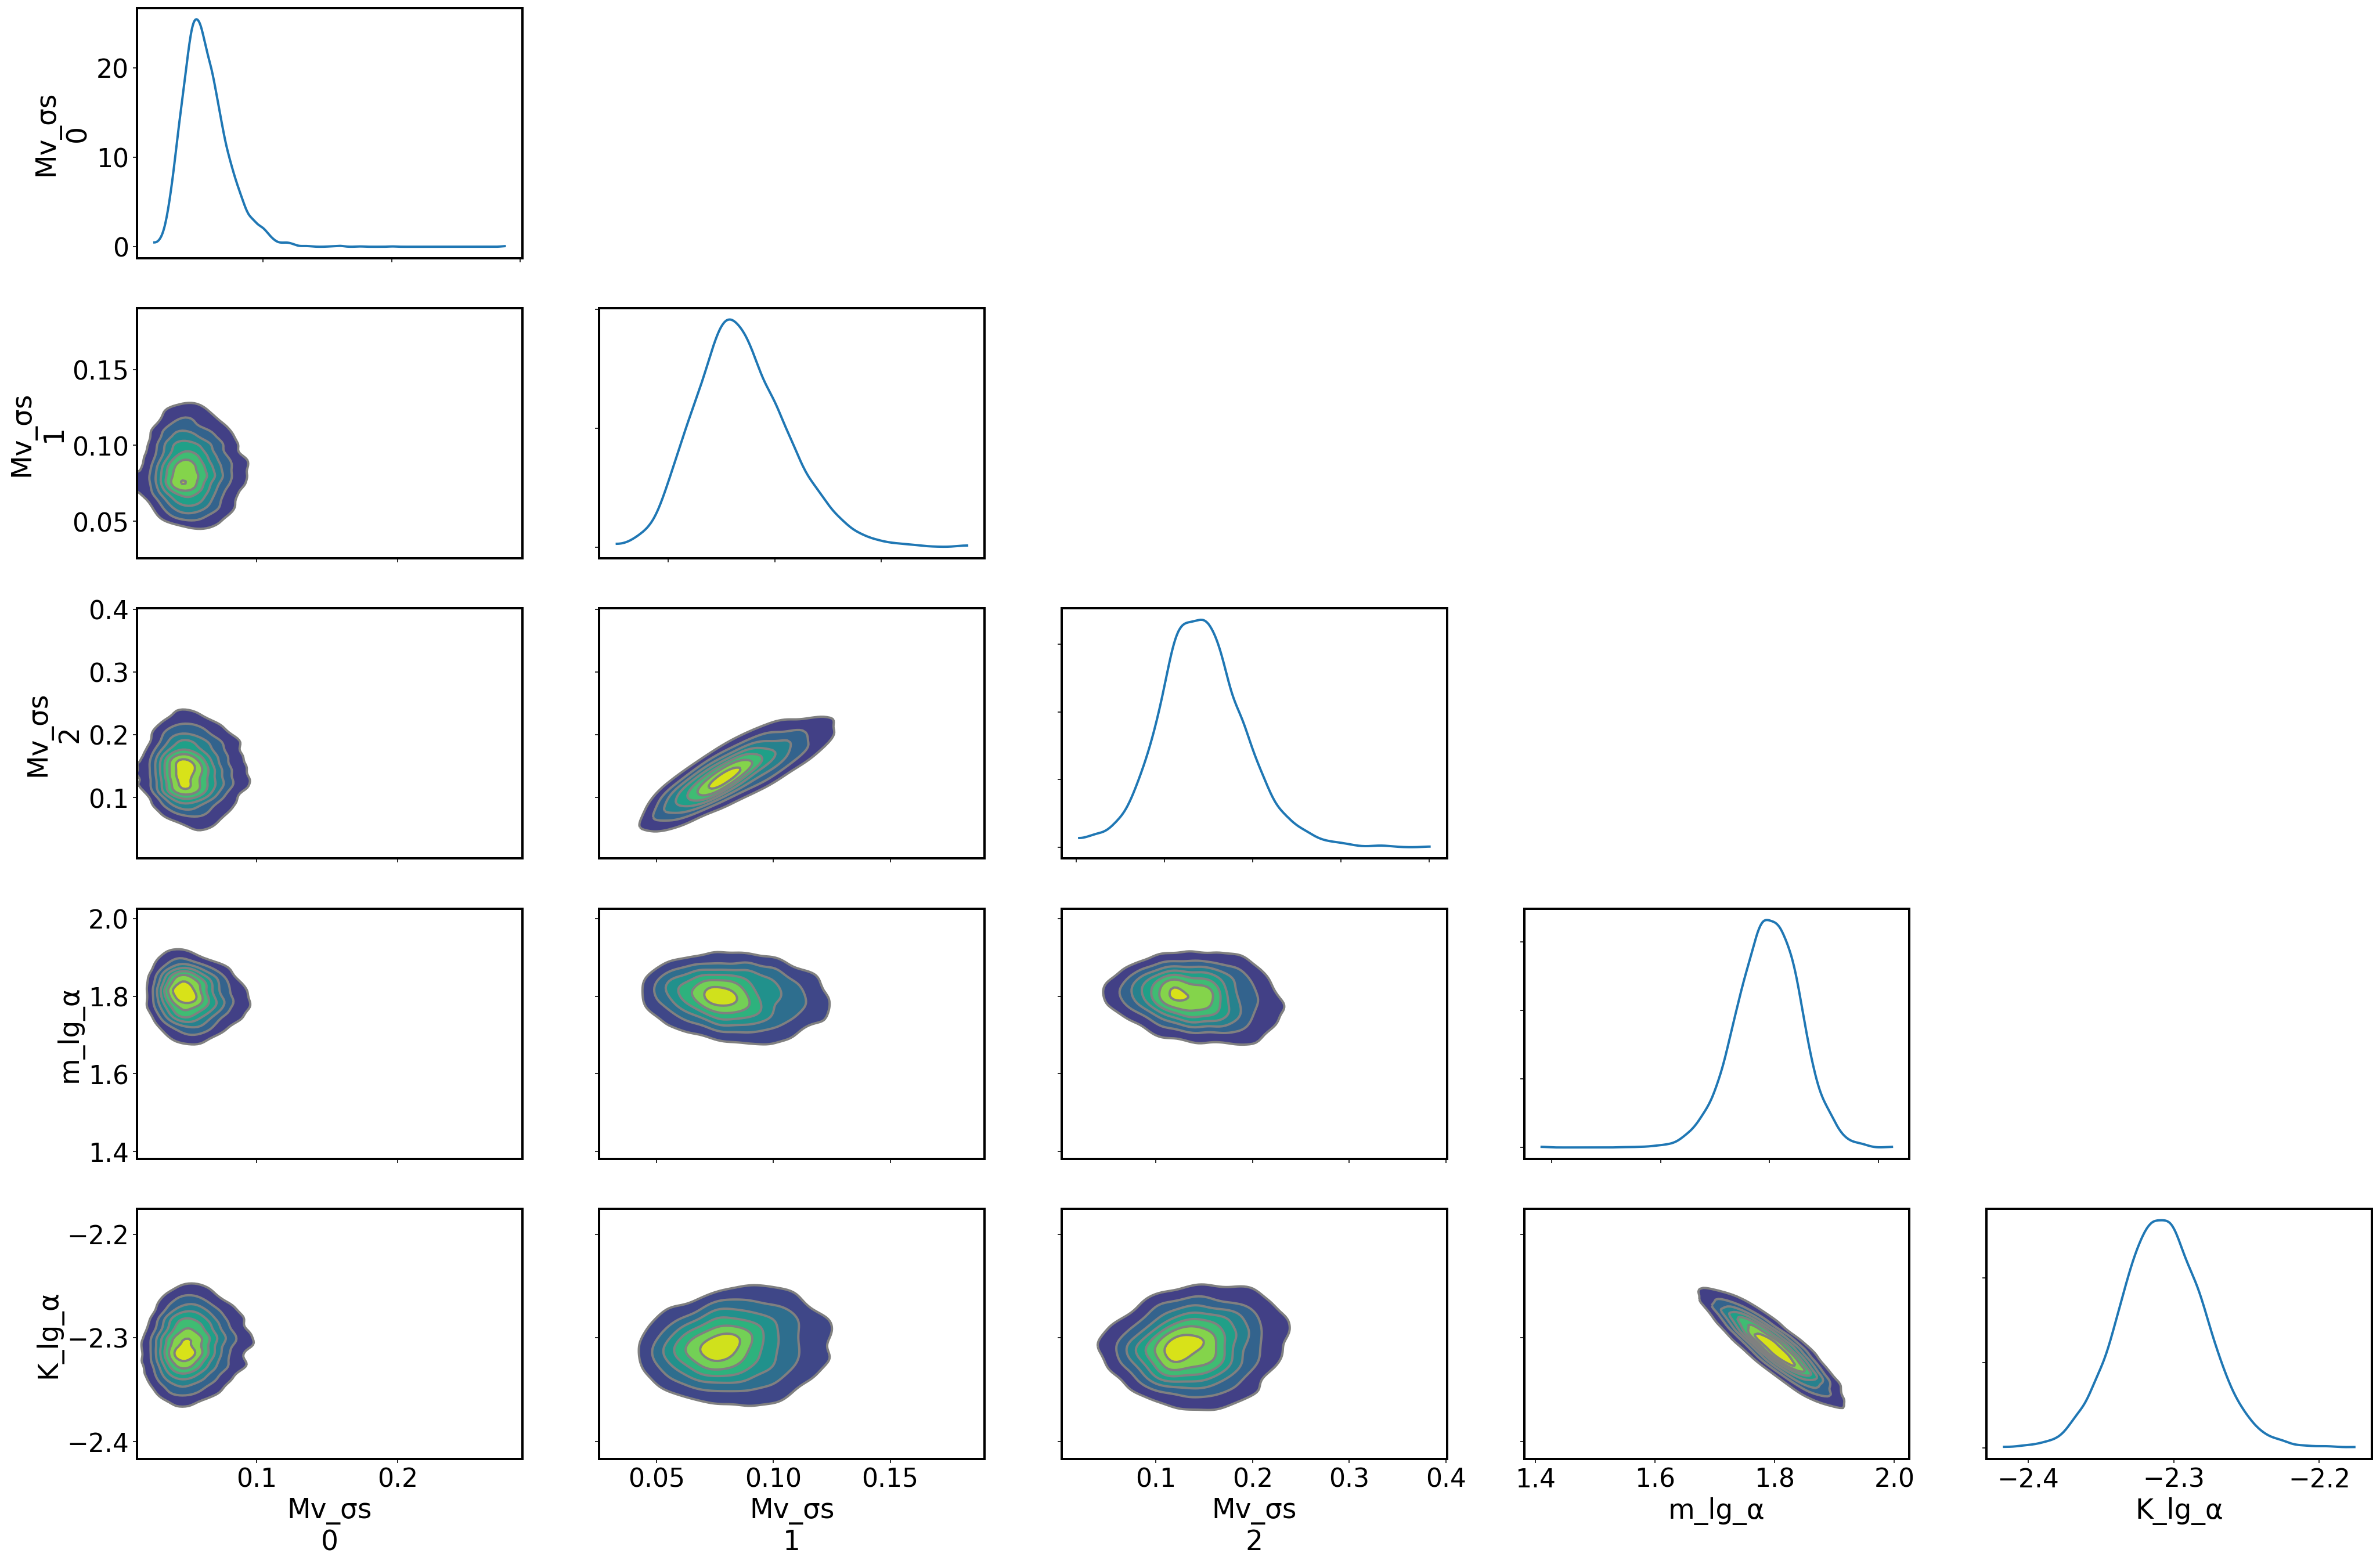

In [23]:
data = idata['TMCC1']['BP280_GC70']
var_names = ['K_lg_α','m_lg_α','offset_α','ρ_lgt_α','τ_lg_α',]
ax = az.plot_pair(data, var_names=['Mv_σs','m_lg_α','K_lg_α'], divergences=True, kind='kde', textsize=22, marginals=True)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

In [11]:
rxn_ests = dict()


for gene in genes:
    
    rxns = pd.read_pickle(data_pth / f'{gene}_rxns.pkl')
    
    all_summaries = pd.concat([df.assign(Tar = tar) for tar,df in summaries[gene].items()])
    all_rxns = pd.concat([
        (rxns[~rxns.outlier]
         .query('Tar == @tar')
         .reset_index(drop=True)
         .reset_index()
         .rename(columns={'index':'Reaction'})
        ) for tar in targets[gene]])
    rxn_ests[gene] = (
        all_summaries[
            all_summaries.index.str.contains('z\[|^r\[|F0_lg\[|ρ\[|τ\[|K\[|m\[')
        ].reset_index()
    )
    rxn_ests[gene] = (
        rxn_ests[gene]
        .join(rxn_ests[gene]['index']
              .str.replace(']','')
              .str.split('[', expand=True)
              .rename(columns={0:'Parameter',1:'Reaction'})
             )[['Tar','Parameter','Reaction','mean','sd','hdi_3%','hdi_97%']]
        .astype({'Reaction':int,'mean':float,'sd':float,'hdi_3%':float,'hdi_97%':float})
        .merge(all_rxns[['Tar','Reaction','Tar_Q','Batch','CT']], on=['Tar','Reaction'])
        .assign(
            Gene=gene,
            BP=lambda df: df['Tar'].map(lambda tar: get_BP(tar,WT_BP=WT_BP[gene])),
            GC=lambda df: df['Tar'].map(lambda tar: get_GC(tar,WT_GC=WT_GC[gene])),
            BP_z=lambda df: stdz(df['BP'],'BP'),
            GC_z=lambda df: stdz(df['GC'],'GC'),
        )
        .query('Batch>1 | (Batch==1 & Tar_Q>3)')
    )[['Gene','Batch','Tar','Tar_Q','Reaction','CT','Parameter','mean','sd','hdi_3%','hdi_97%','BP','GC','BP_z','GC_z']]

rxn_ests['ARG1']['Tar'] = (rxn_ests['ARG1']['Tar']
                           .map(lambda row: row.split(' ')[-1])
                           #.replace('WT','BP108_GC48_WT')
                           #.replace('ISO','BP108_GC48_ISO')
                          )
rxn_ests['GBP6']['Tar'] = (rxn_ests['GBP6']['Tar']
                           .map(lambda row: row.split(' ')[-1])
                           #.replace('WT','BP74_GC53_WT')
                           #.replace('ISO','BP74_GC53_ISO')
                          )

rxn_ests = pd.concat([rxn_ests[gene] for gene in genes]).reset_index(drop=True)
rxn_ests.to_pickle(rslt_pth / 'JG047 Reaction Parameters.pkl',protocol=4)

In [12]:
rxn_ests

,Gene,Batch,Tar,Tar_Q,Reaction,CT,Parameter,mean,sd,hdi_3%,hdi_97%,BP,GC,BP_z,GC_z
0,TMCC1,1,BP88_GC43_ISO,8.0,1,11.738488,τ,15.605,0.014,15.577,15.630,88.0,0.43,0.000000,0.000000
1,TMCC1,1,BP88_GC43_ISO,8.0,1,11.738488,τ_lg_z,-0.683,0.004,-0.690,-0.676,88.0,0.43,0.000000,0.000000
2,TMCC1,1,BP88_GC43_ISO,8.0,1,11.738488,F0_lg,-3.835,0.025,-3.881,-3.787,88.0,0.43,0.000000,0.000000
3,TMCC1,1,BP88_GC43_ISO,8.0,1,11.738488,ρ_lgt_z,-0.719,0.036,-0.785,-0.648,88.0,0.43,0.000000,0.000000
4,TMCC1,1,BP88_GC43_ISO,8.0,1,11.738488,ρ,0.207,0.002,0.203,0.212,88.0,0.43,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,ARG1,1,BP108_GC25,7.0,1,18.184208,F0_lg,-5.629,0.047,-5.720,-5.542,108.0,0.25,0.273059,-0.816761
3766,ARG1,1,BP108_GC25,7.0,1,18.184208,m_lg_z,0.636,0.055,0.534,0.739,108.0,0.25,0.273059,-0.816761
3767,ARG1,1,BP108_GC25,7.0,1,18.184208,K,0.571,0.002,0.567,0.575,108.0,0.25,0.273059,-0.816761
3768,ARG1,1,BP108_GC25,7.0,1,18.184208,K_lg_z,-1.489,0.011,-1.509,-1.469,108.0,0.25,0.273059,-0.816761


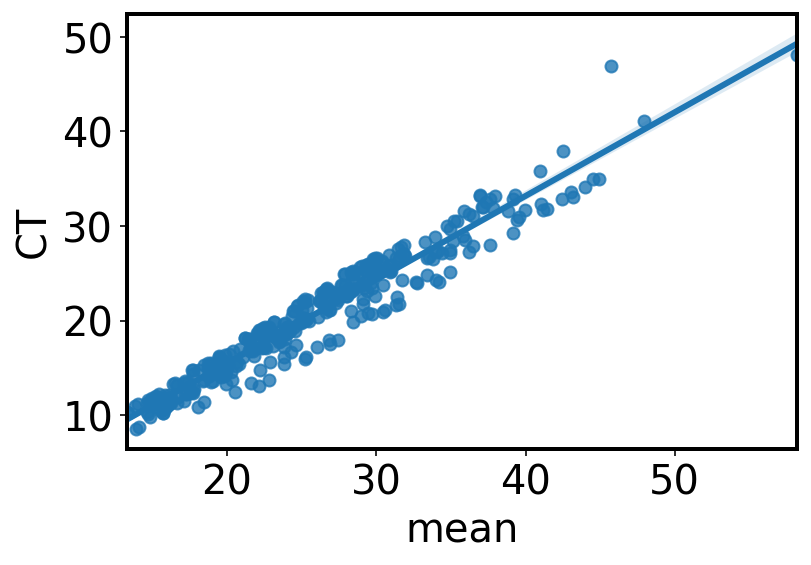

In [16]:
sns.regplot(x='mean',y='CT',data=rxn_ests.query('Parameter=="τ" & CT<60'));

In [17]:
quad_av = lambda std: np.sqrt(np.sum(np.square(std)))/len(std)
df = (rxn_ests
 .query('Gene=="TMCC1" & Parameter=="r"')[['Tar','mean','sd']]
 .groupby('Tar')
 .agg({'mean':[np.mean,np.std],'sd':quad_av})
 #.apply(lambda row: row[('mean','std')]/row[('mean','mean')], axis=1)
)

#sp.stats.hmean(df)
df.sort_values(('mean','mean'))

mean                  sd
                   mean       std  <lambda>
Tar                                        
BP500_GC40     0.397143  0.004634  0.002491
BP280_GC70     0.408667  0.011842  0.001970
BP500_GC60     0.412143  0.008533  0.004387
BP50_GC75      0.461071  0.013310  0.002627
BP160_GC60     0.536071  0.018800  0.002531
BP240_GC43     0.594300  0.006667  0.002385
BP88_GC65      0.624400  0.008540  0.002437
BP280_GC30     0.625357  0.046336  0.001996
BP200_GC43     0.638800  0.008496  0.002478
BP160_GC43     0.655900  0.010682  0.001942
BP88_GC85      0.658000  0.148945  0.004706
BP160_GC80     0.660273  0.200563  0.005238
BP88_GC75      0.663800  0.006630  0.002175
BP88_GC80      0.693400  0.024568  0.001688
BP88_GC55      0.734300  0.006684  0.001688
BP50_GC60      0.739000  0.007932  0.001950
BP160_GC20     0.785857  0.006655  0.001191
BP160_GC10     0.791429  0.037142  0.000866
BP88_GC15      0.820100  0.013972  0.001463
BP88_GC43_ISO  0.821200  0.004962  0.001367
BP88_GC43_WT   0.846500  0.003536  0.001179
BP55_GC43      0.886800  0.005160  0.001095
BP88_GC35      0.917000  0.003712  0.001118
BP40_GC43      0.931800  0.004442  0.001118
BP30_GC43      0.954500  0.002953  0.001281
BP50_GC25      0.960857  0.006503  0.001104
BP88_GC25      0.990600  0.004526  0.001432

In [18]:
quad_av = lambda std: np.sqrt(np.sum(np.square(std)))/len(std)
df = (rxn_ests
 .query('Gene=="GBP6" & Parameter=="r"')[['Tar','mean','sd']]
 .groupby('Tar')
 .agg({'mean':[np.mean,np.std],'sd':quad_av})
 #.apply(lambda row: row[('mean','std')]/row['sd'], axis=1)
)

sp.stats.hmean(df)
df

mean                  sd
                   mean       std  <lambda>
Tar                                        
BP30_GC53      0.898400  0.005873  0.001463
BP74_GC53_ISO  0.791400  0.003658  0.001667
BP74_GC53_WT   0.801556  0.003046  0.001414
BP88_GC43      0.833800  0.002781  0.001054

In [19]:
quad_av = lambda std: np.sqrt(np.sum(np.square(std)))/len(std)
df = (rxn_ests
 .query('Gene=="ARG1" & Parameter=="r"')[['Tar','mean','sd']]
 .groupby('Tar')
 .agg({'mean':[np.mean,np.std],'sd':quad_av})
 #.apply(lambda row: row[('mean','std')]/row['sd'], axis=1)
)

sp.stats.hmean(df)
df

mean                  sd
                   mean       std  <lambda>
Tar                                        
BP108_GC25      0.80500  0.003117  0.002312
BP108_GC48_ISO  0.70500  0.003621  0.002202
BP108_GC48_WT   0.69425  0.003012  0.003771
BP30_GC43       0.84280  0.007941  0.002678
BP88_GC43       0.75320  0.002658  0.002252